In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from os import path, getcwd

C:\Users\Public\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Public\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Public\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Public\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [8]:
# Loading fashion mnist data
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_label), (test_images, test_label) = mnist.load_data()

# Normalizing data
maxpixel = np.max([np.max(train_images),np.max(test_images)])
print(maxpixel)
train_images = train_images/float(maxpixel)
test_images = test_images/float(maxpixel)
trainsize = train_images.shape[0]
testsize = test_images.shape[0]
traindim = train_images.shape[1:3]
testdim = test_images.shape[1:3]
print(trainsize, testsize, traindim, testdim, traindim[1])

# Reshaping information for convention
train_images = train_images.reshape(trainsize, traindim[0], traindim[1], 1)
test_images = test_images.reshape(testsize, testdim[0], testdim[1], 1)
print(train_images.shape, test_images.shape)

255
60000 10000 (28, 28) (28, 28) 28
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [16]:
# Defining the model to run

model = tf.keras.models.Sequential([
        # Convolutional layer with 64 filters each of dimension (3,3) with no padding
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (traindim[0], traindim[1], 1)),
        
        # MaxPooling Layer with window (2,2)
        tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    
        # Second convlutional layer with 64 filters and window of (3,3) with no padding
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    
        # Second Maxpooling Layer with wiondow (2,2) again
        tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    
        # Flattening Layer
        tf.keras.layers.Flatten(),
    
        # Dense layer with units and number of neurons
        tf.keras.layers.Dense(units = 128, activation = tf.nn.relu),
    
        # Dense layer with softmax activation
        tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)
])

# Compiling the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Summarizing the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [17]:
# Fitting the model
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('acc')>0.95):
            print("\nAccuracy of the model exceeds 95% - Aborting Training")
            self.model.stop_training = True
callbacks = myCallBack()            
            
model.fit(train_images, train_label, epochs = 10, callbacks = [callbacks])

Epoch 1/10
60000/60000 [==============================] - 110s 2ms/sample - loss: 0.4447 - acc: 0.8364
Epoch 2/10
60000/60000 [==============================] - 102s 2ms/sample - loss: 0.2960 - acc: 0.8912
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.2489 - acc: 0.9082s - loss: 0.2491 - acc
Epoch 4/10
60000/60000 [==============================] - 115s 2ms/sample - loss: 0.2170 - acc: 0.9187
Epoch 5/10
60000/60000 [==============================] - 126s 2ms/sample - loss: 0.1892 - acc: 0.9294
Epoch 6/10
60000/60000 [==============================] - 123s 2ms/sample - loss: 0.1652 - acc: 0.9372
Epoch 7/10
60000/60000 [==============================] - 121s 2ms/sample - loss: 0.1456 - acc: 0.9456
Epoch 8/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.1275 - acc: 0.9519
Accuracy of the model exceeds 95% - Aborting Training
60000/60000 [==============================] - 125s 2ms/sample - loss: 0.1275 - acc: 0.9519


In [18]:
# Evaluating the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_label)
print(test_loss, test_accuracy)

10000/10000 [==============================] - 4s 382us/sample - loss: 0.2568 - acc: 0.9195s - loss: 0.2614 - acc: 
0.25679346113502977 0.9195


Tensor("conv2d_6_input:0", shape=(?, 28, 28, 1), dtype=float32)


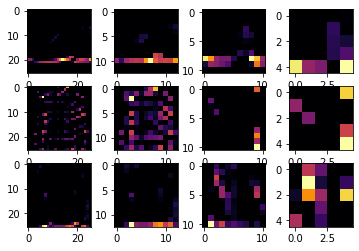

In [20]:
## Visualizing the convolution process

# Generating a plot space with 3 rows and 4 columns
f, axarr = plt.subplots(3,4)
FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models
print(model.input)
# Create an array of the outputs for each layer in the model
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)